In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Importing the necessary libraries
import time

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Jaime

In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/df_NUEVO.csv").copy()

In [10]:
print(df.head())

   idListaCobro  idCredito  consecutivoCobro  idBanco_x  montoExigible  \
0        155938     738973          41396434          2         622.87   
1        155938     739017          41396435          2        1069.11   
2        155939     739185          41396436          2        4340.83   
3        155940     732324          41396437          2        2134.21   
4        155940     737028          41396438          2         815.76   

   montoCobrar  montoCobrado fechaCobroBanco  idRespuestaBanco  caso_exitoso  \
0       622.87          0.00             NaN               4.0             0   
1      1069.11          0.00             NaN               4.0             0   
2      4340.83       4340.83      02/01/2025               0.0             1   
3      2134.21          0.00             NaN               4.0             0   
4       815.76          0.00             NaN               4.0             0   

   ... id_estrategia  servicio tiempo_feedback  Hora_ inicio  Hora_fin  \


Distribución de Pagos por idCredito y Ventana de Fecha de Facturación:
   idCredito billing_date  payment_attempted  payment_successful
0       9872   2025-01-15                 14                   0
1      30466   2025-01-15                 14                   0
2      38430   2025-01-15                  3                   0
3      38430   2025-01-30                  4                   0
4      41330   2025-01-15                 14                   0

Resumen por Ventana de Fecha de Facturación:
  billing_date  total_credits  successful_credits  success_rate
0   2025-01-15           6143                1177      0.191600
1   2025-01-30           5997                1505      0.250959
2   2025-02-15           3238                 771      0.238110
3   2025-02-28           3134                 503      0.160498
4   2025-03-15           6271                1953      0.311434
5   2025-03-30           4792                1087      0.226836
6   2025-04-15           4075                

<ipython-input-15-916fd98bf921>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=billing_date_summary, x='billing_date', y='success_rate', palette='viridis', edgecolor='black')


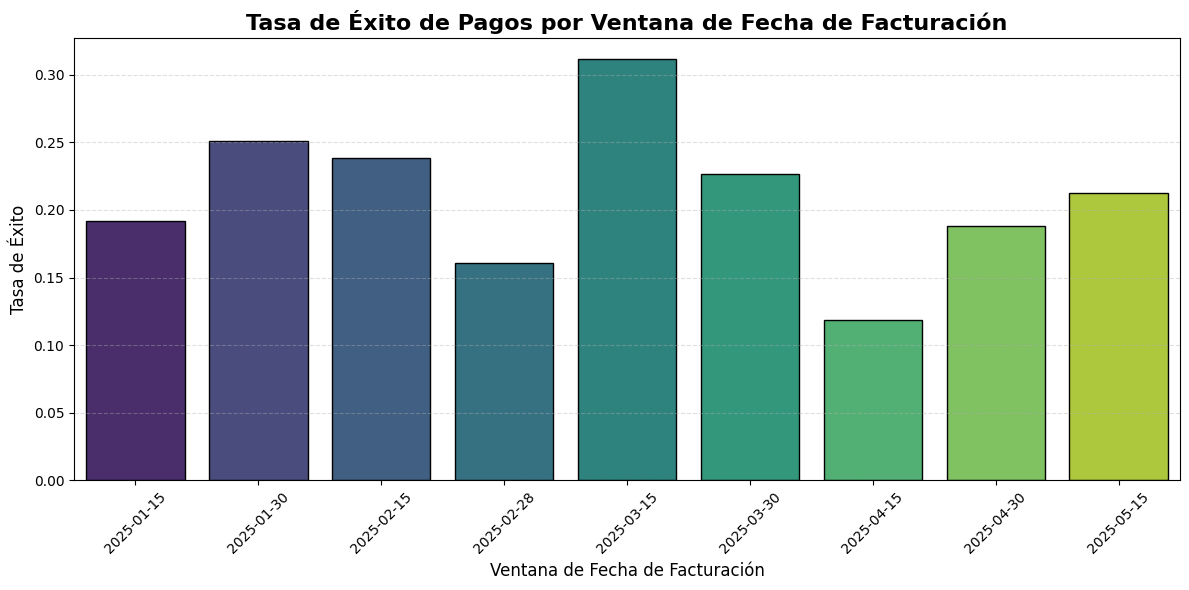

In [15]:
# prompt: from the df dataframe, I want to get the distribution of payments. The payments are due each 15 and 30 of each month. Aggregate the payments of df[idCredito] per billing date and keep the max of "caso_exitoso" to check if a payment was done in this dates, even if it was one or 3 sent. The day can be around 15 and 30, for example 13, 14, 29 or 31, so it would be better to manage this kinds of ranges. Take into account that february has less than 30 days

import pandas as pd
import matplotlib.pyplot as plt
df['fechaEnvioCobro'] = pd.to_datetime(df['fechaEnvioCobro'], dayfirst=True, errors='coerce')

# Define the payment date windows (e.g., 13th to 17th and 28th to end of month)
def assign_billing_date(date):
    if pd.isna(date):
        return None
    day = date.day
    # Window for 15th (covers 13th to 17th)
    if 13 <= day <= 17:
        return date.replace(day=15).date()
    # Window for 30th (covers 28th to end of month)
    elif 28 <= day:
         # Ensure the day does not exceed the number of days in the month
         last_day_of_month = date.days_in_month
         if day <= last_day_of_month:
            return date.replace(day=30).date() if last_day_of_month >= 30 else date.replace(day=last_day_of_month).date()
         else: # Should not happen with the 28 <= day condition if date is valid
             return None
    return None

df['billing_date'] = df['fechaEnvioCobro'].apply(assign_billing_date)

# Filter out rows where billing_date could not be assigned
df_billed = df.dropna(subset=['billing_date']).copy()

# Aggregate by idCredito and billing_date
# Get the max of 'caso_exitoso' to check if at least one payment attempt was successful
payment_distribution = df_billed.groupby(['idCredito', 'billing_date']).agg(
    payment_attempted=('idCredito', 'size'), # Count the number of attempts within the window
    payment_successful=('caso_exitoso', 'max') # Check if any attempt was successful (max 1 means at least one success)
).reset_index()

print("Distribución de Pagos por idCredito y Ventana de Fecha de Facturación:")
print(payment_distribution.head())

# Optional: Aggregate further to see overall success rate per billing date window
billing_date_summary = payment_distribution.groupby('billing_date').agg(
    total_credits=('idCredito', 'nunique'), # Count unique credits that had an attempt in this window
    successful_credits=('payment_successful', lambda x: (x > 0).sum()) # Count credits with at least one success
).reset_index()

# Calculate success rate
billing_date_summary['success_rate'] = billing_date_summary['successful_credits'] / billing_date_summary['total_credits']

print("\nResumen por Ventana de Fecha de Facturación:")
print(billing_date_summary)

# Optional: Visualize the success rate per billing date window
plt.figure(figsize=(12, 6))
sns.barplot(data=billing_date_summary, x='billing_date', y='success_rate', palette='viridis', edgecolor='black')
plt.title('Tasa de Éxito de Pagos por Ventana de Fecha de Facturación', fontsize=16, fontweight='bold')
plt.xlabel('Ventana de Fecha de Facturación', fontsize=12)
plt.ylabel('Tasa de Éxito', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Distribución de Pagos por idCredito y Ventana de Fecha de Facturación:
   idCredito billing_date  payment_attempted  payment_successful
0       9872   2025-01-15                 14                   0
1      30466   2025-01-15                 14                   0
2      38430   2025-01-15                  3                   0
3      38430   2025-01-30                  4                   0
4      41330   2025-01-15                 14                   0

Resumen por Ventana de Fecha de Facturación:
  billing_date  total_credits  successful_credits  success_rate
0   2025-01-15           6143                1177      0.191600
1   2025-01-30           5997                1505      0.250959
2   2025-02-15           3238                 771      0.238110
3   2025-02-28           3134                 503      0.160498
4   2025-03-15           6271                1953      0.311434
5   2025-03-30           4792                1087      0.226836
6   2025-04-15           4075                

<ipython-input-20-137f5ccf6d2e>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=billing_date_summary, x='billing_date', y='success_rate', palette='viridis', edgecolor='black')


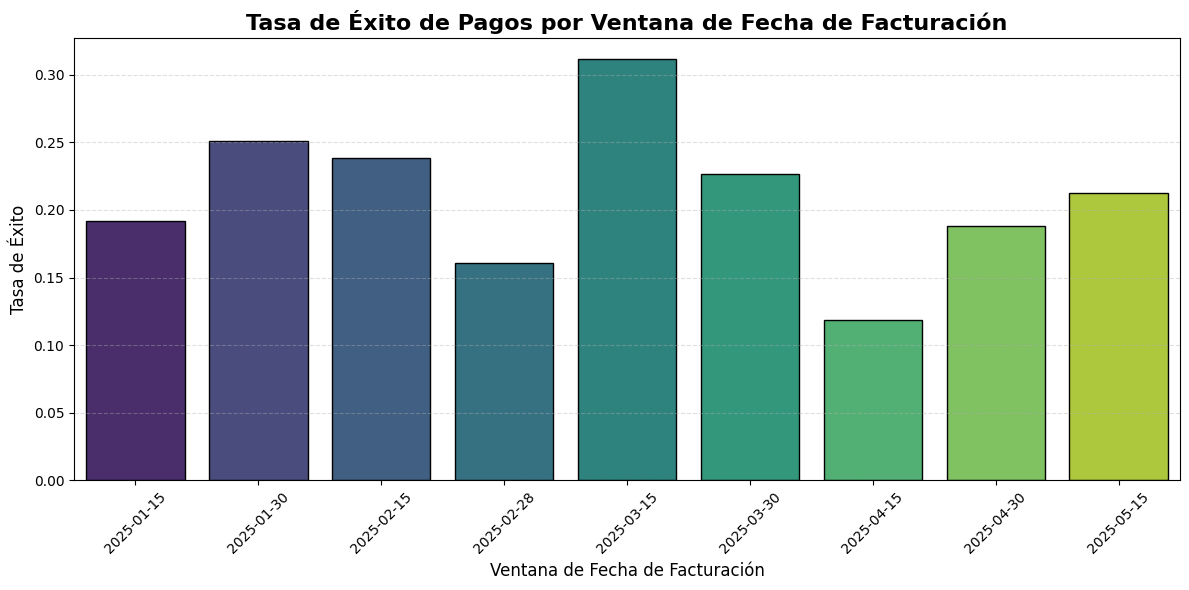

<ipython-input-20-137f5ccf6d2e>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_number_summary, x='payment_number', y='payment_successful', palette='viridis', edgecolor='black')


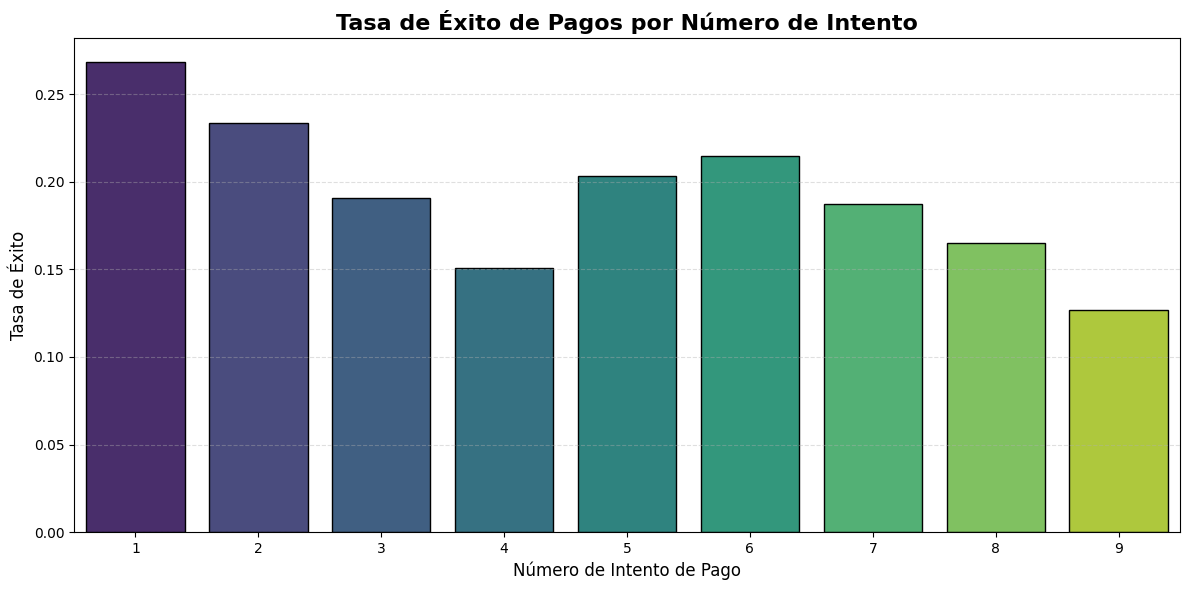

In [20]:
# prompt: from the df dataframe, I want to get the distribution of payments. The payments are due each 15 and 30 of each month. Aggregate the payments of df[idCredito] per billing date and keep the max of "caso_exitoso" to check if a payment was done in this dates, even if it was one or 3 sent. The day can be around 15 and 30, for example 13, 14, 29 or 31, so it would be better to manage this kinds of ranges. Take into account that february has less than 30 days

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['fechaEnvioCobro'] = pd.to_datetime(df['fechaEnvioCobro'], dayfirst=True, errors='coerce')

# Define the payment date windows (e.g., 13th to 17th and 28th to end of month)
def assign_billing_date(date):
    if pd.isna(date):
        return None
    day = date.day
    # Window for 15th (covers 13th to 17th)
    if 13 <= day <= 17:
        return date.replace(day=15).date()
    # Window for 30th (covers 28th to end of month)
    elif 28 <= day:
         # Ensure the day does not exceed the number of days in the month
         last_day_of_month = date.days_in_month
         if day <= last_day_of_month:
            return date.replace(day=30).date() if last_day_of_month >= 30 else date.replace(day=last_day_of_month).date()
         else: # Should not happen with the 28 <= day condition if date is valid
             return None
    return None

df['billing_date'] = df['fechaEnvioCobro'].apply(assign_billing_date)

# Filter out rows where billing_date could not be assigned
df_billed = df.dropna(subset=['billing_date']).copy()

# Aggregate by idCredito and billing_date
# Get the max of 'caso_exitoso' to check if at least one payment attempt was successful
payment_distribution = df_billed.groupby(['idCredito', 'billing_date']).agg(
    payment_attempted=('idCredito', 'size'), # Count the number of attempts within the window
    payment_successful=('caso_exitoso', 'max') # Check if any attempt was successful (max 1 means at least one success)
).reset_index()

print("Distribución de Pagos por idCredito y Ventana de Fecha de Facturación:")
print(payment_distribution.head())

# Optional: Aggregate further to see overall success rate per billing date window
billing_date_summary = payment_distribution.groupby('billing_date').agg(
    total_credits=('idCredito', 'nunique'), # Count unique credits that had an attempt in this window
    successful_credits=('payment_successful', lambda x: (x > 0).sum()) # Count credits with at least one success
).reset_index()

payment_distribution['payment_number'] = payment_distribution.sort_values(by=['idCredito', 'billing_date']).groupby('idCredito').cumcount() + 1

# Calculate success rate
billing_date_summary['success_rate'] = billing_date_summary['successful_credits'] / billing_date_summary['total_credits']

print("\nResumen por Ventana de Fecha de Facturación:")
print(billing_date_summary)

# Optional: Visualize the success rate per billing date window
plt.figure(figsize=(12, 6))
sns.barplot(data=billing_date_summary, x='billing_date', y='success_rate', palette='viridis', edgecolor='black')
plt.title('Tasa de Éxito de Pagos por Ventana de Fecha de Facturación', fontsize=16, fontweight='bold')
plt.xlabel('Ventana de Fecha de Facturación', fontsize=12)
plt.ylabel('Tasa de Éxito', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Calculate the success rate for each payment number
payment_number_summary = payment_distribution.groupby('payment_number')['payment_successful'].mean().reset_index()
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_number_summary, x='payment_number', y='payment_successful', palette='viridis', edgecolor='black')
# Add aesthetics
plt.title('Tasa de Éxito de Pagos por Número de Intento', fontsize=16, fontweight='bold')
plt.xlabel('Número de Intento de Pago', fontsize=12)
plt.ylabel('Tasa de Éxito', fontsize=12)
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.4) # Add a horizontal grid
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot
